In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PEMS.csv')

In [80]:
print(df.head())
df=df.drop("Unnamed: 0", axis=1)
print(df.head())

   Unnamed: 0      AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0           1  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67   
1           2  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67   
2           3  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10   
3           4  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03   
4           5  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67   

      CDP       CO     NOX  
0  11.898  0.32663  81.952  
1  11.892  0.44784  82.377  
2  12.042  0.45144  83.776  
3  11.990  0.23107  82.505  
4  11.910  0.26747  82.028  
       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3  3.7436  1018.3  85.434  3.58



*   AT: Ambient Temperature (°C)
*   AP: Ambient Pressure (mbar)
*   AH: Ambient Humidity (%)
*   AFDP: Air Filter Difference Pressure (mbar)
*   GTEP: Gas Turbine Exhaust Pressure (mbar)
*   TIT: Turbine Inlet Temperature (°C)
*   TAT: Turbine After Temperature (°C)
*   CDP: Compressor Discharge Pressure (mbar)
*   TEY: Turbine Energy Yield (MWH)
*   CO: Carbon Monoxide (mg/m³)
*   NOx: Nitrogen Oxides (mg/m³)

















In [81]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB
None
                 AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000 

In [82]:
target_columns = ['CO','NOX']
x = df.drop(target_columns,axis = 1)
y = df[target_columns]
print(x)
print(y)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910
...       ...     ...     ...     ...     ...     ...     ...     ...     ...
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462

[36733 rows x 9 columns]
             CO      NOX
0       0.326

In [83]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

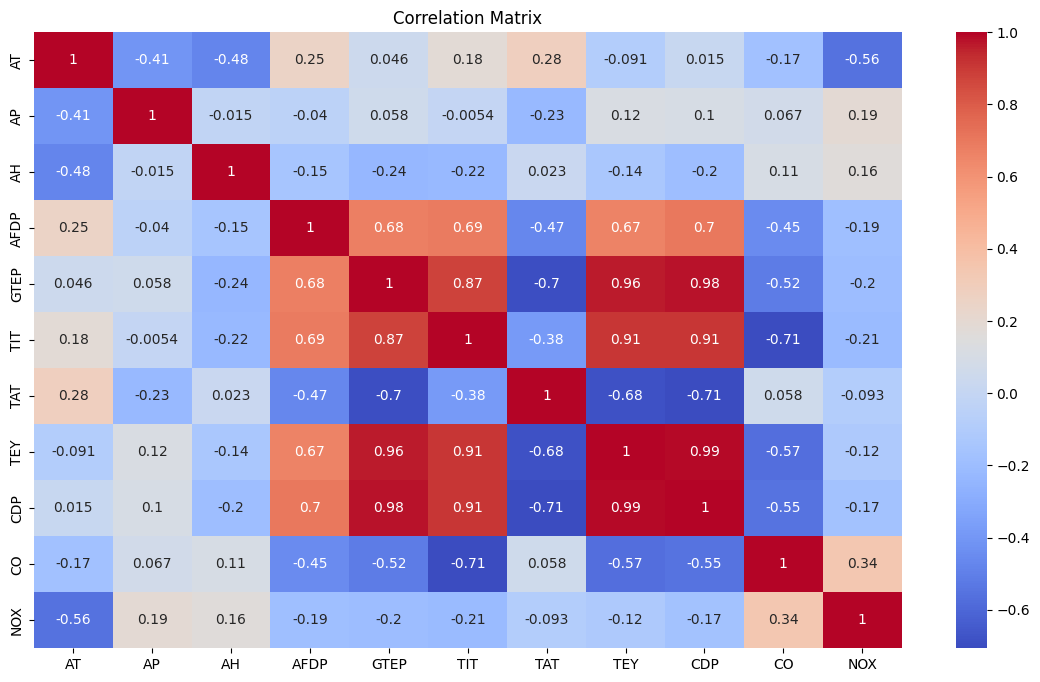

            AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.406601 -0.476291  0.251974  0.045851  0.183706  0.281869   
AP   -0.406601  1.000000 -0.015184 -0.040363  0.057533 -0.005390 -0.225601   
AH   -0.476291 -0.015184  1.000000 -0.147840 -0.235153 -0.221809  0.022965   
AFDP  0.251974 -0.040363 -0.147840  1.000000  0.678485  0.691292 -0.466882   
GTEP  0.045851  0.057533 -0.235153  0.678485  1.000000  0.874234 -0.699703   
TIT   0.183706 -0.005390 -0.221809  0.691292  0.874234  1.000000 -0.380862   
TAT   0.281869 -0.225601  0.022965 -0.466882 -0.699703 -0.380862  1.000000   
TEY  -0.091152  0.118224 -0.137360  0.665483  0.964127  0.910297 -0.682396   
CDP   0.015287  0.102636 -0.196275  0.702568  0.978470  0.908469 -0.706438   
CO   -0.174326  0.067050  0.106586 -0.448425 -0.518909 -0.706275  0.058353   
NOX  -0.558174  0.191938  0.164617 -0.188247 -0.201630 -0.213865 -0.092791   

           TEY       CDP        CO       NOX  
AT   -0.091152  

In [84]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
r2_scores_dict = {}

# ***LinearRegression***

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import Ridge,Lasso


# base_model = Lasso(alpha=3.0)
base_model = LinearRegression()
multi_output_model = MultiOutputRegressor(base_model)


multi_output_model.fit(X_train, y_train)

y_pred = multi_output_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
r2_scores_dict['LinearRegression'] = r2
import numpy as np
new_data = np.array([[4.5878, 1018.7, 83.675, 3.5758, 23.979, 1086.2, 549.83, 134.67, 11.898]])
predictions = multi_output_model.predict(new_data)
print("Predictions:", predictions)


Mean Squared Error: 34.68781429438496
R^2 Score: 0.5256556937335006
Predictions: [[-2051.51589024 15444.68931339]]


# ***DecisionTreeRegressor***

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multioutput import MultiOutputRegressor
basemodel = DecisionTreeRegressor(random_state = 42)
multi_output_model = MultiOutputRegressor(basemodel)
multi_output_model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = multi_output_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
r2_scores_dict['DecisionTreeRegressor'] = r2

import numpy as np
new_data = np.array([[4.5878, 1018.7, 83.675, 3.5758, 23.979, 1086.2, 549.83, 134.67, 11.898]])
predictions = multi_output_model.predict(new_data)
print("Predictions:", predictions)

Mean Squared Error: 18.777646903284946
R^2 Score: 0.6224426072974889
Predictions: [[ 2.0157 87.311 ]]


# ***RandomForestRegressor***

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
basemodel = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42, n_jobs=-1)
multi_output_model = MultiOutputRegressor(basemodel)
multi_output_model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = multi_output_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
r2_scores_dict['RandomForestRegressor'] = r2

import numpy as np
new_data = np.array([[4.5878, 1018.7, 83.675, 3.5758, 23.979, 1086.2, 549.83, 134.67, 11.898]])
predictions = multi_output_model.predict(new_data)
print("Predictions:", predictions)

Mean Squared Error: 13.55471716002837
R^2 Score: 0.7799330992316401
Predictions: [[ 1.60897138 64.95790003]]


# ***ExtraTreesRegressor***

In [90]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
basemodel = ExtraTreesRegressor(random_state = 42)
multi_output_model = MultiOutputRegressor(basemodel)
multi_output_model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = multi_output_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
r2_scores_dict['ExtraTreesRegressor'] = r2

import numpy as np
new_data = np.array([[4.5878, 1018.7, 83.675, 3.5758, 23.979, 1086.2, 549.83, 134.67, 11.898]])
predictions = multi_output_model.predict(new_data)
print("Predictions:", predictions)

Mean Squared Error: 7.780541428960984
R^2 Score: 0.844934439801728
Predictions: [[ 1.39392446 63.03068   ]]


# ***Support Vector Regressor(SVR)***

In [91]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
base_model = SVR(kernel='rbf')
multi_output_model = MultiOutputRegressor(base_model)

multi_output_model.fit(X_train, y_train)

y_pred = multi_output_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_scores_dict['SVR'] = r2

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 16.955835644163617
R^2 Score: 0.716486607526251


# **XGBRegressor**

In [92]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
basemodel = XGBRegressor()
multi_output_model = MultiOutputRegressor(basemodel)
multi_output_model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error , r2_score
y_pred = multi_output_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
r2_scores_dict['XGBRegressor'] = r2


import numpy as np
new_data = np.array([[4.5878, 1018.7, 83.675, 3.5758, 23.979, 1086.2, 549.83, 134.67, 11.898]])
predictions = multi_output_model.predict(new_data)
print("Predictions:", predictions)

Mean Squared Error: 9.981299634521339
R^2 Score: 0.8076959368554164
Predictions: [[ 2.3749511 91.82713  ]]


# ***K-Nearest Neighbors (KNN)***

In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
basemodel = KNeighborsRegressor()
multi_output_model = MultiOutputRegressor(basemodel)
multi_output_model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error , r2_score
y_pred = multi_output_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
r2_scores_dict['KNeighborsRegressor'] = r2


import numpy as np
new_data = np.array([[4.5878, 1018.7, 83.675, 3.5758, 23.979, 1086.2, 549.83, 134.67, 11.898]])
predictions = multi_output_model.predict(new_data)
print("Predictions:", predictions)

Mean Squared Error: 10.256935457966932
R^2 Score: 0.8089922027911296
Predictions: [[ 1.701678 72.0032  ]]


# ***GradientBoostingRegressor***

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

base_model = GradientBoostingRegressor(random_state=42)

multi_output_model = MultiOutputRegressor(base_model)
multi_output_model.fit(X_train, y_train)

y_pred = multi_output_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
r2_scores_dict['GradientBoostingRegressor'] = r2


import numpy as np
new_data = np.array([[4.5878, 1018.7, 83.675, 3.5758, 23.979, 1086.2, 549.83, 134.67, 11.898]])
predictions = multi_output_model.predict(new_data)
print("Predictions:", predictions)

Mean Squared Error: 18.14391398562279
R^2 Score: 0.7256152498161009
Predictions: [[ 1.69695409 62.88688015]]


# ***NEURAL NETWORK***

In [95]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1]))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)

mse_value = mean_squared_error(y_test, y_pred)
r2_value = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_value)
print("R^2 Score:", r2_value)
r2_scores_dict['NEURALNETWORK'] = r2

import numpy as np
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
new_data = np.array([[ 4.5878, 1018.7, 83.675, 3.5758, 23.979, 1086.2, 549.83, 134.67, 11.898]])
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
print("Predictions:", predictions)

Epoch 1/10
735/735 [==============================] - 3s 2ms/step - loss: 453.6534 - val_loss: 40.0998
Epoch 2/10
735/735 [==============================] - 2s 3ms/step - loss: 162.0300 - val_loss: 41.0107
Epoch 3/10
735/735 [==============================] - 3s 4ms/step - loss: 154.9297 - val_loss: 34.9417
Epoch 4/10
735/735 [==============================] - 2s 3ms/step - loss: 147.3121 - val_loss: 32.2202
Epoch 5/10
735/735 [==============================] - 2s 2ms/step - loss: 143.5498 - val_loss: 30.2230
Epoch 6/10
735/735 [==============================] - 2s 2ms/step - loss: 140.7995 - val_loss: 24.0151
Epoch 7/10
735/735 [==============================] - 2s 2ms/step - loss: 139.9839 - val_loss: 32.6617
Epoch 8/10
735/735 [==============================] - 2s 2ms/step - loss: 133.5225 - val_loss: 32.1611
Epoch 9/10
735/735 [==============================] - 2s 2ms/step - loss: 132.0078 - val_loss: 32.5503
Epoch 10/10
230/230 [==============================] - 0s 2ms/step
Mean S

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [96]:
for model, r2_score in r2_scores_dict.items():
    print(f"{model}: {r2_score}")

LinearRegression: 0.5256556937335006
DecisionTreeRegressor: 0.6224426072974889
RandomForestRegressor: 0.7799330992316401
ExtraTreesRegressor: 0.844934439801728
SVR: 0.716486607526251
XGBRegressor: 0.8076959368554164
KNeighborsRegressor: 0.8089922027911296
GradientBoostingRegressor: 0.7256152498161009
NEURALNETWORK: 0.7256152498161009


In [103]:
best_model_name = None
best_r2_score = -float('inf')

for model, r2_score in r2_scores_dict.items():
    if r2_score > best_r2_score:
        best_r2_score = r2_score
        best_model_name = model

print(f"The best R^2 score is {best_r2_score} achieved by {best_model_name}.")


The best R^2 score is 0.844934439801728 achieved by ExtraTreesRegressor.
